<a href="https://colab.research.google.com/github/Asuskf/helpingPeople/blob/master/sklearn_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ejercicio 1A



In [1]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)


In [0]:
import sklearn as skl
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [3]:

data = pd.read_csv('ionosphere_data.txt',header=None,names=['x'+str(i) for i in range(35)],index_col=False)
data = data.rename(columns={'x34':'y'})
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,y
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [0]:
y_dict = {
    'g':1,
    'b':0,
}
data.y = data.y.map(y_dict)

In [0]:
dataClean = data.drop(data[(data['y'] == 0)].index)

In [0]:
dataClean = data.drop(columns=['x1'])

In [0]:
data = dataClean

In [128]:
data

,x0,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,y
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [0]:
#Matriz de covariancia
X = data.drop(columns='y')
matrix = X.shape[0]
matrixCov = X.T / (matrix-1) @ (np.eye(matrix) - np.ones((matrix,matrix))/ matrix) @ X


In [110]:
matrixCov.to_numpy()

array([[ 9.68172568e-02,  4.67742582e-02, -8.96767277e-04, ...,
        -1.61261797e-02,  2.65023388e-02,  1.57212666e-03],
       [ 4.67742582e-02,  2.47713455e-01,  3.14980661e-02, ...,
        -2.38546505e-03,  6.85045331e-02,  1.36143025e-04],
       [-8.96767277e-04,  3.14980661e-02,  1.94864665e-01, ...,
        -2.78372506e-02, -3.55229406e-02,  7.15495763e-03],
       ...,
       [-1.61261797e-02, -2.38546505e-03, -2.78372506e-02, ...,
         2.63758624e-01, -3.48911069e-03,  1.23869077e-01],
       [ 2.65023388e-02,  6.85045331e-02, -3.55229406e-02, ...,
        -3.48911069e-03,  2.73177001e-01, -3.22720992e-02],
       [ 1.57212666e-03,  1.36143025e-04,  7.15495763e-03, ...,
         1.23869077e-01, -3.22720992e-02,  2.19339755e-01]])

In [108]:
np.cov(X.T)

array([[ 9.68172568e-02,  4.67742582e-02, -8.96767277e-04, ...,
        -1.61261797e-02,  2.65023388e-02,  1.57212666e-03],
       [ 4.67742582e-02,  2.47713455e-01,  3.14980661e-02, ...,
        -2.38546505e-03,  6.85045331e-02,  1.36143025e-04],
       [-8.96767277e-04,  3.14980661e-02,  1.94864665e-01, ...,
        -2.78372506e-02, -3.55229406e-02,  7.15495763e-03],
       ...,
       [-1.61261797e-02, -2.38546505e-03, -2.78372506e-02, ...,
         2.63758624e-01, -3.48911069e-03,  1.23869077e-01],
       [ 2.65023388e-02,  6.85045331e-02, -3.55229406e-02, ...,
        -3.48911069e-03,  2.73177001e-01, -3.22720992e-02],
       [ 1.57212666e-03,  1.36143025e-04,  7.15495763e-03, ...,
         1.23869077e-01, -3.22720992e-02,  2.19339755e-01]])

In [0]:
autoValues, autoVectors = np.linalg.eigh(matrixCov)

In [45]:
autoValues

array([0.02134866, 0.03121104, 0.0377422 , 0.03978231, 0.04506265,
       0.04815018, 0.05340651, 0.05760683, 0.06454805, 0.06699981,
       0.07225005, 0.0880885 , 0.09342543, 0.10096348, 0.10494425,
       0.10980726, 0.1188362 , 0.12946504, 0.13388771, 0.15246957,
       0.16147008, 0.17037042, 0.19117632, 0.20886699, 0.25042157,
       0.26632153, 0.27816012, 0.34064532, 0.45167303, 0.64279583,
       0.69266341, 1.13708673, 2.90436153])

In [42]:
autoVectors

array([[ 0.21739276, -0.33591403,  0.57718291, ..., -0.08183259,
         0.00635553, -0.02325839],
       [-0.16641603, -0.01663054, -0.13978823, ..., -0.30494054,
         0.07767383, -0.10138455],
       [-0.14428516,  0.05510034, -0.02875172, ..., -0.14870004,
         0.04604199,  0.07201262],
       ...,
       [ 0.15213392,  0.07656747,  0.02912933, ..., -0.13899732,
         0.173524  , -0.02009187],
       [-0.15173189,  0.25578736,  0.30603865, ..., -0.21658876,
        -0.14413142, -0.20017617],
       [-0.22516923,  0.07102973,  0.07506407, ..., -0.18385181,
         0.14498102,  0.01747586]])

In [43]:
sum(autoValues)

9.266008628422998

In [44]:
matrixTrace = np.trace(matrixCov)
matrixTrace

9.266008628423002

In [14]:
propVariability = autoValues / matrixTrace
propVariability

array([0.00230398, 0.00336834, 0.00407319, 0.00429336, 0.00486322,
       0.00519643, 0.0057637 , 0.00621701, 0.00696611, 0.00723071,
       0.00779732, 0.00950663, 0.0100826 , 0.01089611, 0.01132572,
       0.01185055, 0.01282496, 0.01397204, 0.01444934, 0.01645472,
       0.01742607, 0.0183866 , 0.020632  , 0.0225412 , 0.02702583,
       0.02874177, 0.03001941, 0.0367629 , 0.04874516, 0.06937138,
       0.07475316, 0.12271592, 0.31344257])

In [15]:
porcent = propVariability * 100
porcent

array([ 0.23039759,  0.33683367,  0.40731882,  0.42933597,  0.48632215,
        0.51964314,  0.57637018,  0.62170061,  0.69661113,  0.72307087,
        0.77973217,  0.95066279,  1.00825974,  1.08961135,  1.13257238,
        1.18505458,  1.28249614,  1.39720397,  1.444934  ,  1.64547193,
        1.74260667,  1.83866023,  2.06320031,  2.25412044,  2.70258301,
        2.87417744,  3.00194104,  3.67628972,  4.87451555,  6.93713827,
        7.47531588, 12.27159156, 31.34425673])

In [0]:
y = sorted(porcent, reverse=True)

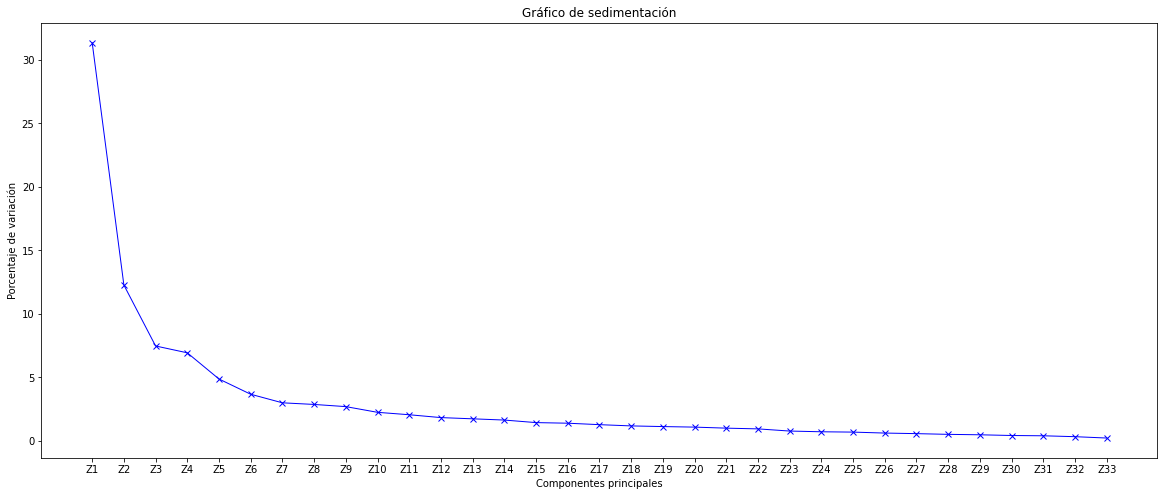

In [17]:
plt.figure(figsize=(20,8))
plt.plot(['Z'+str(i+1) for i in range(len(porcent))], y , color='blue', marker='x', linewidth=1, markersize=6)
plt.title('Gráfico de sedimentación')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de variación')
plt.show()

In [0]:
retainedValues = autoValues[[31, 32]]

In [0]:
retainedAutoVect = autoVectors[:,[31,32]]

In [20]:
allVectors = autoVectors[0,0]
l1 = autoValues[0]
matrix11 = matrixCov['x0'][0]
rx1y1 = (allVectors * np.sqrt(l1)) / np.sqrt(matrix11)
rx1y1

0.10208313705475476

In [107]:
from tabulate import tabulate
rxy = []
for i in range(18):
  for k in range(2):
    aki = retainedAutoVect[i,k]
    lk = retainedValues[k]
    Sii = matrixCov.to_numpy()[i,i]
    rxiyk = aki * np.sqrt(lk) / np.sqrt(Sii)
    rxy.append(rxiyk)

print("Correlacion entre variables y los componentes extraidos: \n \n", tabulate(np.array(rxy).reshape(18,2), ["Comp.1", "Comp.2"], showindex=['X'+str(i+1) for i in range(18)]) )

Correlacion entre variables y los componentes extraidos: 
 
          Comp.1      Comp.2
---  ----------  ----------
X1    0.0217807  -0.127388
X2    0.166417   -0.347154
X3    0.11122     0.278014
X4    0.165584   -0.495193
X5   -0.039244    0.282601
X6    0.18203    -0.609639
X7    0.128132    0.467488
X8    0.187634   -0.696448
X9    0.143418    0.463661
X10   0.20907    -0.759284
X11   0.266441    0.385222
X12   0.208153   -0.802113
X13   0.391014    0.294199
X14   0.190904   -0.857597
X15   0.463708    0.26894
X16   0.0673412  -0.831871
X17   0.573176    0.0451423
X18   0.0401878  -0.818076


In [21]:
#Ejercicio 1 a
sum(y[0:24])
#se necesita 24 componentes principales

95.6954667500479

##Ejercicio 1B


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
fitLabel = le.fit(autoValues)
classes = le.classes_
transform = le.transform(classes)
resultIT = le.inverse_transform(transform[0:17])

In [190]:
#Ejercio 1 b
print(np.power(np.mean(resultIT), 2) - np.power(np.mean(propVariability), 2))
print(np.var(autoValues))
#No tienen relación

0.0036911251826045642
0.26777085675526097


##Ejercicio 1C


In [0]:
originalData = autoValues[:2]
transformData = resultIT[:2]

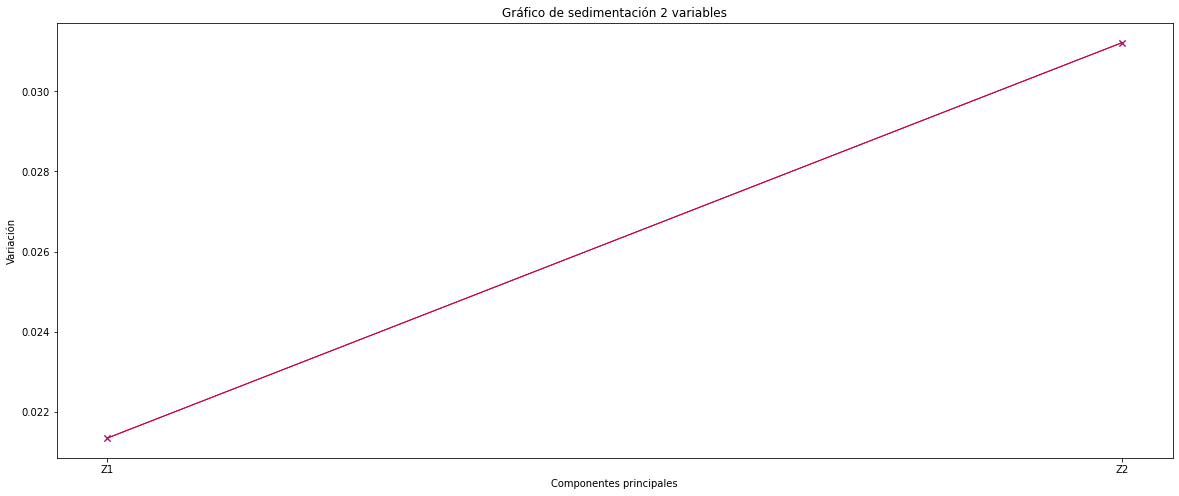

In [117]:
plt.figure(figsize=(20,8))
plt.plot(['Z'+str(i+1) for i in range(len(originalData))], originalData , color='blue', marker='x', linewidth=1, markersize=6)
plt.plot(['Z'+str(i+1) for i in range(len(originalData))], transformData , color='red', marker='x', linewidth=1, markersize=6)
plt.title('Gráfico de sedimentación 2 variables')
plt.xlabel('Componentes principales')
plt.ylabel('Variación')
plt.show()

##Ejercicio 2


In [0]:
from sklearn.manifold import MDS

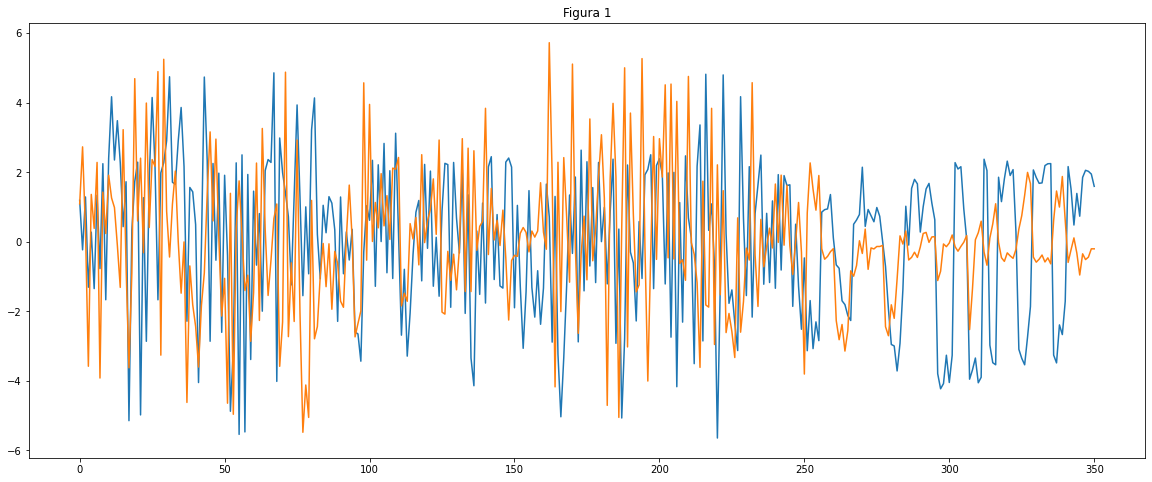

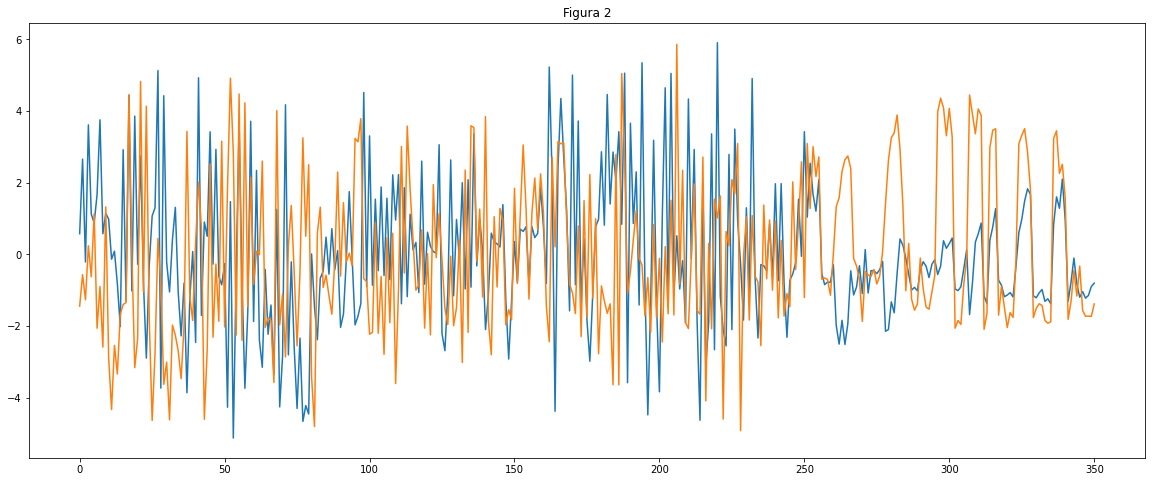

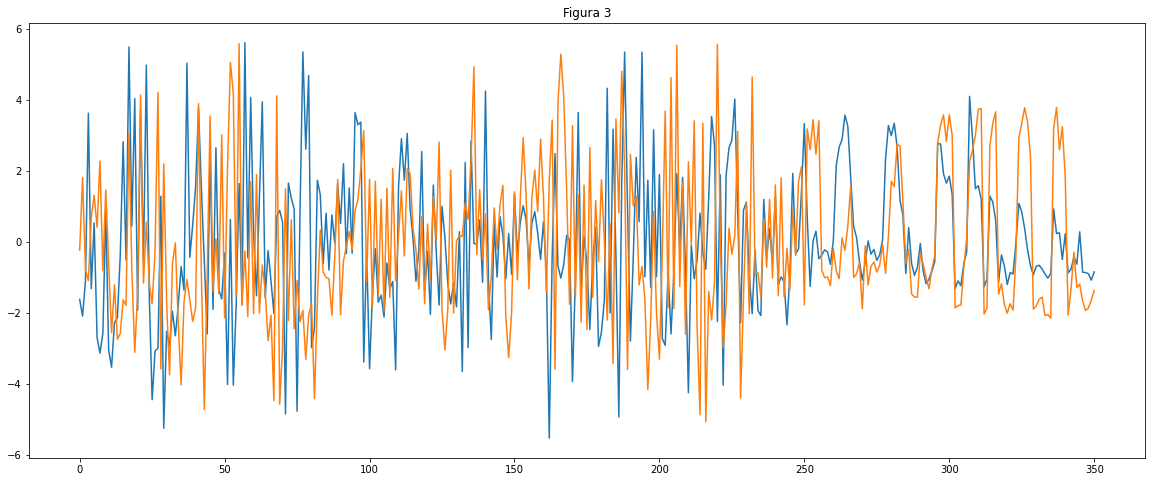

In [27]:
for i in range(3):
  embedding = MDS(n_components=2)
  X_transformed = embedding.fit_transform(data)
  plt.figure(figsize=(20,8))
  plt.plot(X_transformed)
  plt.title('Figura %d' % (i+1))

##Ejercicio 3

In [0]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import time

In [0]:
X_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

In [0]:
def grapKNeighbors(X_data, y_data, title, listRange):
  avg_scores = []
  para_values = listRange
  for n_neighbors in para_values:
    start = time.time()
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X_data, y_data, scoring='accuracy')
    stop = time.time()
    avg_scores.append(np.mean(scores))
    print(f"Training time: {stop - start}s score: {np.mean(scores)}")
  
  plt.plot(para_values,avg_scores,'--o')
  plt.title(title)
  plt.xlabel('Time')
  plt.ylabel('Prediccion')
  plt.show()


In [0]:
def grapScore(paremeters, X_data, y_data, title):
  avg_scores = []
  para_values = list(range(1))
  for n_neighbors in para_values:
    start = time.time()
    estimator = paremeters
    scores = cross_val_score(estimator, X_data, y_data, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    stop = time.time()
    print(f"Training time: {stop - start}s score: {np.mean(scores)}")
    
    plt.plot(para_values,avg_scores,'--o')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Prediccion')
    plt.show()


Training time: 0.042005300521850586s score: 0.8432997987927566
Training time: 0.0349123477935791s score: 0.8718712273641852
Training time: 0.03499650955200195s score: 0.8318712273641851
Training time: 0.041671037673950195s score: 0.8432997987927567
Training time: 0.036832332611083984s score: 0.8261971830985916


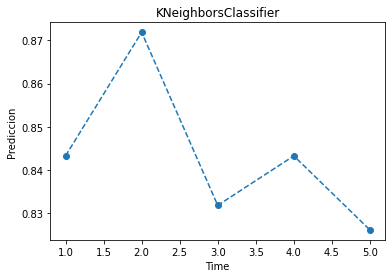

In [32]:
#1 a 5 vecinos
grapKNeighbors(X_data, y_data, 'KNeighborsClassifier', list(range(1,6)))

Training time: 0.04283618927001953s score: 0.8318712273641851
Training time: 0.040529489517211914s score: 0.8432997987927567
Training time: 0.040567874908447266s score: 0.8261971830985916


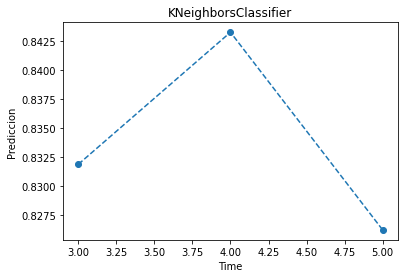

In [33]:
#3,4,5 vecinos
grapKNeighbors(X_data, y_data, 'KNeighborsClassifier', list(range(3,6)))

Training time: 0.03621482849121094s score: 0.8490543259557345


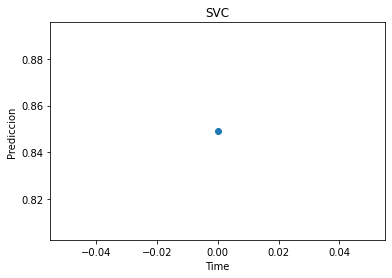

In [34]:
#SVC
grapScore(SVC(gamma='auto', kernel='linear', C=0.025), X_data, y_data, 'SVC')

Training time: 0.04131507873535156s score: 0.8719517102615694


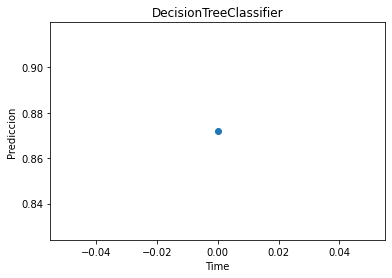

In [35]:
#DecisionTreeClassifier
grapScore(DecisionTreeClassifier(max_depth=5), X_data, y_data, 'DecisionTreeClassifier')

Training time: 0.5361714363098145s score: 0.9147283702213279


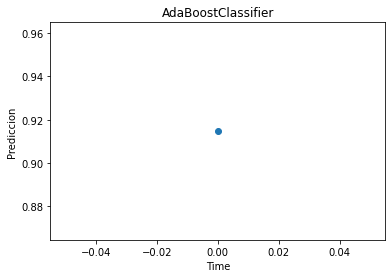

In [36]:
#AdaBoostClassifier
grapScore(AdaBoostClassifier(), X_data, y_data, 'AdaBoostClassifier')

Training time: 0.0247647762298584s score: 0.866036217303823


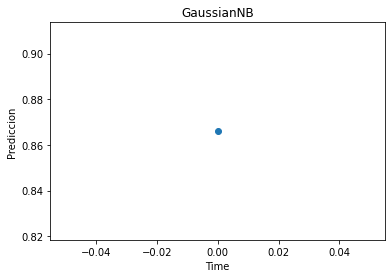

In [37]:
#GaussianNB
grapScore(GaussianNB(), X_data, y_data, 'GaussianNB')